# Table of content
* [About QR](#About-QR)
* [The QR Code Modes](#The-QR-Code-Modes)
* [Data Encoding](#Data-Encoding)
  * [Step 1: Choose the Error Correction Level](#Step-1:-Choose-the-Error-Correction-Level)
  * [Step 2: Determine the Smallest Version for the Data](#Step-2:-Determine-the-Smallest-Version-for-the-Data)
  * [Character Capacities by Version, Mode, and Error Correction](#Character-Capacities-by-Version,-Mode,-and-Error-Correction)
  * [Step 3: Add the Mode Indicator](#Step-3:-Add-the-Mode-Indicator)
  * [Step 4: Add the Character Count Indicator](#Step-4:-Add-the-Character-Count-Indicator)
  * [Step 5: Encode Using the Selected Mode](#Step-5:-Encode-Using-the-Selected-Mode)
  * [Step 6: Break Up into 8-bit Codewords and Add Pad Bytes if necessary](#Step-6:-Break-Up-into-8-bit-Codewords-and-Add-Pad-Bytes-if-necessary)
* [Error Correction Coding](#Error-Correction-Coding)
  * [Step 1: Break Data Codewords into Blocks if Necessary](#Step-1:-Break-Data-Codewords-into-Blocks-if-Necessary)
  * [Understand Galois Field Arithmetic](#Understand-Galois-Field-Arithmetic)
* [Structure Final Message](#Structure-Final-Message)
  * [Interleave the Blocks](#Interleave-the-Blocks)
  * [Add Remainder Bits if Necessary](#Add-Remainder-Bits-if-Necessary)
* [Module Placement in Matrix](#Module-Placement-in-Matrix)
  * [Inserting format information, data bits and applying masking](#Inserting-format-information,-data-bits-and-applying-masking)
  * [Masking:](#Masking:)
* [Penalty evaluation on masked QR.](#Penalty-evaluation-on-masked-QR.)
* [Displaying the least penalty QR code](#Displaying-the-least-penalty-QR-code)
* [Displaying all essential variables](#Displaying-all-essential-variables)

# About QR
**QR stands for (quick response)**. The smallest QR codes are 21x21 pixels, and the largest are 177x177. The sizes are called versions. **The 21x21 pixel size is version 1, 25x25 is version 2, and so on. The 177x177 size is version 40.**

In addition, **QR codes include error correction: when you encode the QR code, you also create some redundant data that will help a QR reader accurately read the code even if part of it is unreadable.** There are four levels of error correction that you can choose from:
1. The lowest is L, which allows the code to be read even if 7% of it is unreadable. 
* After that is M, which provides 15% error correction, 
* then Q, which provides 25%,
* finally H, which provides 30%.

The capacity of a given QR code depends on the version and error correction level, as well as on the type of data that you are encoding. **There are four data modes that a QR code can encode: numeric, alphanumeric, binary, or Kanji.**

# The QR Code Modes
This tutorial considers only 2 modes i.e, **Numeric mode and Alphanumeric mode.**
1. **Numeric mode** is for decimal digits 0 through 9.
2. **Alphanumeric mode** is for the decimal digits 0 through 9, as well as uppercase letters (not lowercase!), and the symbols `$, %, *, +, -, ., /, and :` as well as a space.

# Data Encoding

## Step 1: Choose the Error Correction Level
QR codes use Reed-Solomon error correction. Error correction codewords can be used to correct those errors. There are four levels of error correction: L, M, Q, H.  

| Error Correction Level | Error Correction Capability |
| :---: | :---: |
| L | Recovers 7% of data |
| M | Recovers 15% of data |
| Q | Recovers 25% of data |
| H | Recovers 30% of data |

In [1]:
import re
text=input("Enter the text to be encoded\n")


alpha_string='0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ $%*+-./:'
num_string='0123456789'
text1=text.upper()
if len(re.findall(r'[{}]'.format(num_string),text1))==len(text1):
    print('Mode of encoding: NUMERIC')
    mode=0
elif len(re.findall(r'[{}]'.format(alpha_string),text1))==len(text1):
    print('Mode of encoding: ALPHANUMERIC')
    text=text1
    mode=1
else:
    print('Mode of encoding: BYTE')
    mode=2
ECL=eval(input("""Enter error correction level:
0 for L (Low)
1 for M (Medium)
2 for Q
3 for H (High)\n"""))
print("MODE SELECTED: {} and ERROR CORECTION LEVEL SELECTED: {}".format(mode,ECL))

Enter the text to be encoded
subir kumar saha
Mode of encoding: ALPHANUMERIC
Enter error correction level:
0 for L (Low)
1 for M (Medium)
2 for Q
3 for H (High)
0
MODE SELECTED: 1 and ERROR CORECTION LEVEL SELECTED: 0


## Step 2: Determine the Smallest Version for the Data
Each version has a maximum capacity, depending on the mode in use. In addition, the error correction
level restricts the capacity further.  
[Link to Character Capacities by Version, Mode, and Error Correction](#Character-Capacities-by-Version,-Mode,-and-Error-Correction)

# Character Capacities by Version, Mode, and Error Correction

In [2]:
# Displaying the table for character capacity
import pandas as pd
char_capacity=pd.read_csv('character_capacity.csv')
char_capacity.head(8)

,version->,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,Numericmode(L),41,77,127,187,255,322,370,461,552,...,4417,4686,4965,5253,5529,5836,6153,6479,6743,7089
1,Numericmode(M),34,63,101,149,202,255,293,365,432,...,3486,3693,3909,4134,4343,4588,4775,5039,5313,5596
2,Numericmode(Q),27,48,77,111,144,178,207,259,312,...,2473,2670,2805,2949,3081,3244,3417,3599,3791,3993
3,Numericmode(H),17,34,58,82,106,139,154,202,235,...,1897,2022,2157,2301,2361,2524,2625,2735,2927,3057
4,AlphanumericMode(L),25,47,77,114,154,195,224,279,335,...,2677,2840,3009,3183,3351,3537,3729,3927,4087,4296
5,AlphanumericMode(H),20,38,61,90,122,154,178,221,262,...,2113,2238,2369,2506,2632,2780,2894,3054,3220,3391
6,AlphanumericMode(Q),16,29,47,67,87,108,125,157,189,...,1499,1618,1700,1787,1867,1966,2071,2181,2298,2420
7,AlphanumericMode(H),10,20,35,50,64,84,93,122,143,...,1150,1226,1307,1394,1431,1530,1591,1658,1774,1852


In [3]:
import numpy as np
max_capacity=np.zeros((40,4,4),dtype=np.uint16)
for i in range(40):
    for j in range(4):
        max_capacity[i,:,j]=char_capacity.iloc[4*j:4*j+4,i+1]

for i in range(40):
    if max_capacity[i,ECL,mode]>len(text):
        version=i
        break
print('Selected version is: {}'.format(version))

Selected version is: 0


## Step 3: Add the Mode Indicator
Each encoding mode has a four-bit mode indicator that identifies it.

| Mode Name | Mode Indicator |
| :---: | :---: |
|Numeric Mode | 0001 |
|Alphanumeric Mode | 0010 |
|Byte Mode | 0100 |
|Kanji Mode | 1000 |
|ECI Mode | 0111 |

In [4]:
mode_indicator_array=('0001','0010','0100','1000','0111')
mode_indicator=mode_indicator_array[mode]
print('mode indicator selected: {}'.format(mode_indicator))

mode indicator selected: 0010


## Step 4: Add the Character Count Indicator
The character count indicator is a string of bits that **represents the number of characters that are being
encoded.** The character count indicator must be **placed after the mode indicator.** Character count indicator must be a **certain number of bits long, depending on the QR version.**

Count the number of characters in the original input text, then convert that number into binary. The length of the character count indicator depends on the encoding mode and the QR code version that will be in use. **To make the binary string the appropriate length, pad it on the left with 0s.**

| | Numeric mode | Alphanumeric mode | Byte mode | Japanese mode |
| :-: | :-: | :-: | :-: | :-: |
| Versions 1 through 9 | 10 bits | 9 bits | 8 bits | 8 bits |
| Versions 10 through 26 | 12 bits | 11 bits | 16 bits | 10 bits |
| Versions 27 through 40 | 14 bits | 13 bits | 16 bits | 12 bits |

In [5]:
character_count_array=np.array([[10,9,8,8],
                               [12,11,16,10],
                               [14,13,16,12]],dtype=np.uint8)
if 1<=version+1<=9:
    character_count_len=character_count_array[0,mode]
elif 10<=version+1<=26:
    character_count_len=character_count_array[1,mode]
elif 27<=version+1<=40:
    character_count_len=character_count_array[2,mode]
character_count=bin(len(text))[2:].zfill(character_count_len)
print('Character count for text: {}'.format(character_count))

Character count for text: 000010000


## Step 5: Encode Using the Selected Mode
**Each mode has separate encoding.**  
[Link to numeric encoding](#Numeric-encoding)  
[Link to alphanumeric encoding](#Alphanumeric-encoding)  
[Link to byte encoding](#Byte-encoding)

### Numeric encoding
1. In numeric mode ,data is delimited by 3 digits. For example,"123456" is delimited "123" and "456",and first data is "123",second data is "456".
2. And each data is encoded in 10 bit long binary representation.
3. When length of delimited data is 1 or 2, 4 bit long or 7 bit long are used in each case. For example,"9876" is delimited "987" in 10 bit long and "6" in 4 bit long. Its result is "1111011011 0110"

Link to **[reference website](http://www.swetake.com/qrcode/qr2_en.html)**.

In [6]:
if mode==0:
    l=len(text)
    data=''
    for i in range(0,l,3):
        if len(text[i:i+3])==3:
            data+=bin(eval(text[i:i+3]))[2:].zfill(10)
        if len(text[i:i+3])==2:
            data+=bin(eval(text[i:i+3]))[2:].zfill(7)
        if len(text[i:i+3])==1:
            data+=bin(eval(text[i:i+3]))[2:].zfill(4)
    print('Numeric encoded data string is : {}'.format(data))

### Alphanumeric encoding
1. Take a sample string say "HELLO WORLD" and split it into pairs of 2 i.e, 'HE','LL','O ','WO','RL' and 'D'.
* Find the index of each character in pair and convert it into a number i.e, H->17 and E->14, so equivalent number is `17*45+14=779`.
* convert that number into an 11-bit binary string i.e, 779->01100001011
* If you are encoding an odd number of characters, as we are here, take the numeric representation of the final character and convert it into a 6-bit binary string.

In [7]:
if mode==1:
    alphanumeric_lst=[i for i in '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ $%*+-./:']
    l=len(text)
    data=''
    for i in range(0,l,2):
        if len(text[i:i+2])==2:
            data+=bin(alphanumeric_lst.index(text[i])*45+alphanumeric_lst.index(text[i+1]))[2:].zfill(11)
        else:
            data+=bin(alphanumeric_lst.index(text[i]))[2:].zfill(6)
    print('Alphanumeric encoded data string is : {}'.format(data))

Alphanumeric encoded data string is : 1010000101001000000001100111000110111010001001111101000100111000111001111011001100000111


### Byte encoding
1. This encoding can encode more symbols, compared to Alphanumeric encoding.
* Every character in the string is converted to its 8-bits ASCII representation and mearged together.

In [8]:
if mode==2:
    data=''
    for i in text:
        data+=bin(ord(i))[2:].zfill(8)
    print('Byte encoded data string is : {}'.format(data))

## Step 6: Break Up into 8-bit Codewords and Add Pad Bytes if necessary
After obtaining a string of bits that consists of the mode indicator, the character count indicator, and the data bits, it may be necessary to add 0s and pad bytes, **because the QR code specification requires that the bit string must completely fill the total capacity of the QR code.** So, follow the below steps:
* Determine the Required Number of Bits for this QR Code (form the below table)
* Add a Terminator of 0s if Necessary at end to make no. of bits multiple of 8.
* Add Pad Bytes if the String is Still too Short (11101100 00010001) these bytes are equivalent to 236 and 17, respectively.

In [9]:
# Displaying the data
import pandas as pd
ECT=pd.read_csv('error_correction_table.csv')
ECT.head(12)

,Version and EC Level,Total Number of Data Codewords,EC Codewords Per Block,Number of Blocks in Group 1,Number of Data Codewords in Each of Group 1's Blocks,Number of Blocks in Group 2,Number of Data Codewords in Each of Group 2's Blocks,Total Data Codewords
0,1-L,19,7,1,19,0,0,(19*1)=19
1,1-M,16,10,1,16,0,0,(16*1)=16
2,1-Q,13,13,1,13,0,0,(13*1)=13
3,1-H,9,17,1,9,0,0,(9*1)=9
4,2-L,34,10,1,34,0,0,(34*1)=34
5,2-M,28,16,1,28,0,0,(28*1)=28
6,2-Q,22,22,1,22,0,0,(22*1)=22
7,2-H,16,28,1,16,0,0,(16*1)=16
8,3-L,55,15,1,55,0,0,(55*1)=55
9,3-M,44,26,1,44,0,0,(44*1)=44


In [10]:
codeWord,ErrorBlock,nb1,wnb1,nb2,wnb2=ECT.iloc[4*version+ECL,1:7]
print('Total Codeword for version: {} and Error correction level: {} is {}'.format(version+1,ECL,codeWord))
combined_data=mode_indicator+character_count+data
l=len(combined_data)
if codeWord*8-4<=l<codeWord*8:
    combined_data+=''.zfill(codeWord*8-l)
else:
    combined_data+=''.zfill(4)
l=len(combined_data)
if l!=codeWord*8:
    if l%8!=0:
        combined_data=combined_data+''.zfill(8-l%8)
    l=len(combined_data)
    padding=['11101100','00010001']
    for i in range(codeWord):
        if len(combined_data)==8*codeWord:
            break
        combined_data=combined_data+padding[i%2]
print('Encoded data: {}\nLength of encoded data: {} bits\nNo. of bits required for this version: {} bits'.format(
    combined_data,len(combined_data),codeWord*8))

Total Codeword for version: 1 and Error correction level: 0 is 19
Encoded data: 00100000100001010000101001000000001100111000110111010001001111101000100111000111001111011001100000111000000000001110110000010001111011000001000111101100
Length of encoded data: 152 bits
No. of bits required for this version: 152 bits


# Error Correction Coding

## Step 1: Break Data Codewords into Blocks if Necessary
Divide the codeword in small blocks of 8 bits.

In [11]:
codeblocks=[int(combined_data[i:i+8],base=2) for i in range(0,len(combined_data),8)]
print('8 bit blocks are: {}'.format(codeblocks))

8 bit blocks are: [32, 133, 10, 64, 51, 141, 209, 62, 137, 199, 61, 152, 56, 0, 236, 17, 236, 17, 236]


The error correction table mentions "group 1" and "group 2", as well as "number of blocks." This means that the data codewords must be split up into up to two groups, and within each group, the data codewords may be further broken up into blocks. The data codewords are broken up sequentially.

In [12]:
block_groups,count=[],0
for i in range(nb1):
    block_groups.append(codeblocks[count:count+wnb1])
    count+=wnb1
for i in range(nb2):
    block_groups.append(codeblocks[count:count+wnb2])
    count+=wnb2
print('Groups divided into blocks:\n')
for i in block_groups:
    print(i)

Groups divided into blocks:

[32, 133, 10, 64, 51, 141, 209, 62, 137, 199, 61, 152, 56, 0, 236, 17, 236, 17, 236]


## Understand Galois Field Arithmetic
1. Addition:  
GF(256) contains the numbers 0 through 255 inclusive. Mathematical operations in GF(256) are cyclical in nature, meaning that if a mathematical operation is performed within GF(256) that results in a number larger than 255, it will be necessary to use the modulo operation to get a number that is still in the Galois Field. Addition and subtraction in the Galois Field are performed by doing the addition or subtraction as normal, but then performing the modulo operation and **this is the same as performing the XOR operation.**
* Generate Powers of 2 using Byte-Wise Modulo 100011101(285):  
All numbers in GF(256) can be represented as 2 , where 0 <= n <= 255. The QR code specification says to use byte-wise modulo 100011101 arithmetic (where 100011101 is a binary number that is equivalent to 285 in decimal). This means that **when a number is 256 or larger, it should be XORed with 285.** Because all of the values can be represented with 2 as explained above, it is possible to logs and antilogs to simplify multiplication in GF(256).
* Understanding The Generator Polynomial:  
The message polynomial will be divided by a generator polynomial. The generator polynomial is a polynomial that is created by multiplying $(x-\alpha)\dots(x-\alpha^{n-1})$ where n is the number of error correction codewords that must be generated. As mentioned in the previous section, $\alpha$ is equal to 2. When the Exponents are Greater than or Equal to 256, in this case, **apply modulo 255 BEFORE combining like terms.** For example:
$$
\alpha^{258}x = \alpha^{\text{258%255}}x = \alpha^{3}x
$$
* Generating Error Correction Codewords:  
For each block group, the coefficients represent a message polynomial. From the version and error correction level (ECL) value, **find the number of error codeblocks needed.** To make sure that the exponent of the lead term of message polynomial doesn't become too small during the division, **multiply the message polynomial by $x^n$ where $n$ is the number of error correction codewords that are needed and divide it with generator polynomial, to find the remainder polynomial whose coefficients becomes error codewords.**

In [13]:
def log_function():
    a=[1]
    for i in range(1,256):
        a.append(a[i-1]*2)
        if a[i]>255:
            a[i]^=285
    return a
log=log_function()
def anti_log_function(log):
    a=[None]
    for i in range(1,256):
        a.append(log.index(i))
    return a
anti_log=anti_log_function(log)
def mul(x,y,log=log,anti_log=anti_log):
    if x==0 or y==0:
        return 0
    return log[(anti_log[x]+anti_log[y])%255]
def add(x,y):
    return x^y
def generator_function(eb,log=log,anti_log=anti_log):
    gen_poly=[1,1]
    for i in range(1,eb):
        temp=mul(gen_poly[-1],log[i])
        for j in range(i,0,-1):
            gen_poly[j]=add(mul(gen_poly[j],1),mul(gen_poly[j-1],log[i]))
        gen_poly.append(temp)
    return gen_poly
def poly_divide(msg,gen):
    gen_len=len(gen)
    msg_len=len(msg)
    msg.extend([0]*(gen_len-1))
    for k in range(msg_len):
        multiple=[mul(gen[i],msg[0]) for i in range(gen_len)]
        for i in range(gen_len):
            msg[i]=msg[i]^multiple[i]
        msg.remove(0)
    return msg
# poly_divide()
genrator_poly=generator_function(ErrorBlock)
error_block_groups=[]
for i in block_groups:
    bg=i.copy()
    error_block_groups.append(poly_divide(bg,genrator_poly))
print('Error codeblocks generated are:')
for i,j in enumerate(error_block_groups):
    print('Error codeblock no. {}:{}'.format(i,j))

Error codeblocks generated are:
Error codeblock no. 0:[185, 124, 144, 161, 124, 15, 6]


# Structure Final Message

## Interleave the Blocks
The blocks are interleaved by doing the following:
1. take the first data codeword from the first block
2. followed by the first data codeword from the second block
3. followed by the first data codeword from the third block
4. followed by the first data codeword from the fourth block
5. followed by the second data codeword from the first block
6. and so on  

This pattern is repeated, going across the blocks, until all of the data codewords have been
interleaved.  

After that, do the following:
1. take the first error correction codeword from the first block
2. followed by the first error correction codeword from the second block
3. followed by the first error correction codeword from the third block
4. followed by the first error correction codeword from the fourth block
5. followed by the second error correction codeword from the first block
6. and so on
Do this until all error correction codewords have been used up.  
**Put Interleaved Error Correction Codewords After Interleaved Data Codewords.** The final message consists of the interleaved data codewords followed by the interleaved error correction codewords.

## Add Remainder Bits if Necessary
For some QR versions, the final binary message is not long enough to fill the required number of bits.
In this case, it is necessary to add a certain number of 0s to the end of the final message to make it
have the correct length. These extra 0s are called remainder bits.

In [14]:
last_ind=max(wnb1,wnb2)
final_msg=[]
for i in range(last_ind):
    for j in block_groups:
        try:
            final_msg.append(j[i])
        except:
            continue
for i in range(ErrorBlock):
    for j in error_block_groups:
        try:
            final_msg.append(j[i])
        except:
            continue
print('Final message after interleaving (in blocks of 8 bits): \n',final_msg)
final_msg_string=''
for i in final_msg:
    final_msg_string+=bin(i)[2:].zfill(8)
print('Final message before remainder bits:')
print(final_msg_string)
# Adding remainder bits
remainder_bits=(0,7,7,7,7,7,0,0,0,0,0,0,0,3,3,3,3,3,3,3,4,4,4,4,4,4,4,3,3,3,3,3,3,3,0,0,0,0,0,0)
final_msg_string+=''.zfill(remainder_bits[version])
print('Final message after remainder bits:')
print(final_msg_string)

Final message after interleaving (in blocks of 8 bits): 
 [32, 133, 10, 64, 51, 141, 209, 62, 137, 199, 61, 152, 56, 0, 236, 17, 236, 17, 236, 185, 124, 144, 161, 124, 15, 6]
Final message before remainder bits:
0010000010000101000010100100000000110011100011011101000100111110100010011100011100111101100110000011100000000000111011000001000111101100000100011110110010111001011111001001000010100001011111000000111100000110
Final message after remainder bits:
0010000010000101000010100100000000110011100011011101000100111110100010011100011100111101100110000011100000000000111011000001000111101100000100011110110010111001011111001001000010100001011111000000111100000110


# Module Placement in Matrix

Follow the below steps:
1. Add Finder pattern, alignment pattern, separators, timing pattern and dark module as shown in the figure.  
**Note: Alignment pattern are at fixed locations in QR and should not overlap with FInder pattern.**
![basic qr](./images/basic_qr.png)
2. If QR version is more than 6, than versio information area should also be reserved.

**About version information:**
1. Version information is represents information about version of QR.
* It is 18 bits long and represented in QR at 2 positions respectively as shown in the figure.
![version information](./images/version_information.png)
* Since all QR version 7 and above have version information string, so total of 34 version string exists depending on the version which is also hard coded below.
* **Note, that 17th bit is the MSB and 0th bit is the LSB.**

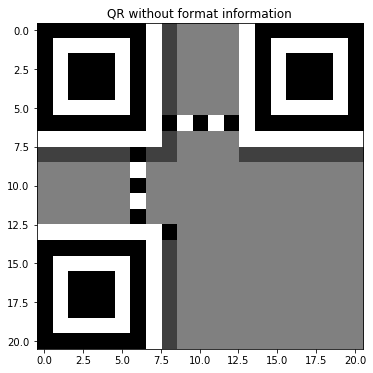

In [15]:
import matplotlib.pyplot as plt
size=4*version+21
qr=128*np.ones((size,size),dtype=np.uint8)

# Applying finder pattern
finder_pattern=np.array([
    [0,0,0,0,0,0,0,255],
    [0,255,255,255,255,255,0,255],
    [0,255,0,0,0,255,0,255],
    [0,255,0,0,0,255,0,255],
    [0,255,0,0,0,255,0,255],
    [0,255,255,255,255,255,0,255],
    [0,0,0,0,0,0,0,255],
    [255,255,255,255,255,255,255,255]
],dtype=np.uint8)
qr[0:8,0:8]=finder_pattern
qr[size-8:,0:8]=finder_pattern[::-1,:]
qr[0:8,size-8:]=finder_pattern[:,::-1]

# Adding alignment pattern
alignment_pattern=np.array([
    [0,0,0,0,0],
    [0,255,255,255,0],
    [0,255,0,255,0],
    [0,255,255,255,0],
    [0,0,0,0,0]
],dtype=np.uint8)
alignment_loc={0:(),1:(6,18),2:(6,22),3:(6,26),4:(6,30),5:(6,34),6:(6,22,38),7:(6,24,42),8:(6,26,46),9:(6,28,50)}
a=[(i,j) for i in alignment_loc[version] for j in alignment_loc[version]]
for x,y in a:
    if 0 in qr[x-2:x+3,y-2:y+3]:
        continue
    qr[x-2:x+3,y-2:y+3]=alignment_pattern

# Adding timing pattern
for i in range(8,size-8):
    qr[6,i]=255*(i%2)
    qr[i,6]=255*(i%2)
    
# Adding dark module
qr[size-8,8]=0

# Adding format information reserved area
qr[8,np.where(qr[8,0:9]==128)[0]]=64
qr[8,size-8+np.where(qr[8,size-8:]==128)[0]]=64
qr[size-8+np.where(qr[size-8:,8]==128)[0],8]=64
qr[np.where(qr[0:9,8]==128)[0],8]=64
            
# Adding version information
if version>=6:
    version_area=['000111110010010100','001000010110111100','001001101010011001','001010010011010011',
              '001011101111110110','001100011101100010','001101100001000111','001110011000001101',
              '001111100100101000','010000101101111000','010001010001011101','010010101000010111',
              '010011010100110010','010100100110100110','010101011010000011','010110100011001001',
              '010111011111101100','011000111011000100','011001000111100001','011010111110101011',
              '011011000010001110','011100110000011010','011101001100111111','011110110101110101',
              '011111001001010000','100000100111010101','100001011011110000','100010100010111010',
              '100011011110011111','100100101100001011','100101010000101110','100110101001100100',
              '100111010101000001','101000110001101001']
    version_info=version_area[version-6]
    temp=[255*(ord(version_info[i])-48) for i in range(17,-1,-1)]
    version_mat=np.array(temp,dtype=np.uint8)
    qr[size-11:size-8,0:6]=version_mat.reshape(3,6)
    qr[0:6,size-11:size-8]=version_mat.reshape(6,3)
    
mask_arr=qr
fig,ax=plt.subplots(1,1,figsize=(6,6))
ax.imshow(qr,cmap='gray')
plt.title('QR without format information')
plt.show()

# Inserting format information, data bits and applying masking

**About Format information:**
1. Format information contains information about error crrection levelused and also the mask pattern used.
* Since there are 4 error correction level and 8 mask levels, so total 32 combinations of the format string exist which is hard-coded below.
* It is 15 bits long and is written twice in QR at following positions as shown in the figure.
![format information](./images/format_information.png)
* The 15 bits of information is divided into 5 data bits and 10 error correction bits from reed soloman algorithm.
* The data bits include error correction information which is represented in 2 bits and mask information in 3 bits.
* **Note, that 14th bit is the MSB and 0th bit is the LSB.**


3. Place the data bits as follows:
![data placement](./images/data_placement.png)
**Note: When a function pattern is encountered, skip any occupied modules until you reach the next unused module. The vertical timing pattern is the only exception to this rule. When the vertical timing pattern is reached, always start the next column to the left of it. No column should ever overlap the vertical timing pattern.**

## Note, 0 corresponds to a white pixel and 1 corresponds to a black pixel.

## Masking:
**Note: 
1. Masking is done only on data bits, not on the regions reserved for finder pattern, alignment pattern, timing pattern, dark module, format information, and version information.  
* There are total of 8 masking patterns and each with a corresponding mask number.
* Also, note that row and column numbering starts top-left with coordinates (0,0) and likewise bottom-right has coordinates (20,20) for version 1.

| Mask Number | If the formula below is true for a given row/column coordinate, switch the bit at that coordinate |
| :-: | :-: |
| 0 | $(row + column) \% 2 == 0$ |
| 1 | $(row) \% 2 == 0$ |
| 2 | $(column) \% 3 == 0$ |
| 3 | $(row + column) \% 3 == 0$ |
| 4 | $( floor(row / 2) + floor(column / 3) ) \% 2 == 0$ |
| 5 | $((row * column) \% 2) + ((row * column) \% 3) == 0$ |
| 6 | $( ((row * column) \% 2) + ((row * column) \% 3) ) \% 2 == 0$ |
| 7 | $( ((row + column) \% 2) + ((row * column) \% 3) ) \% 2 == 0$ |

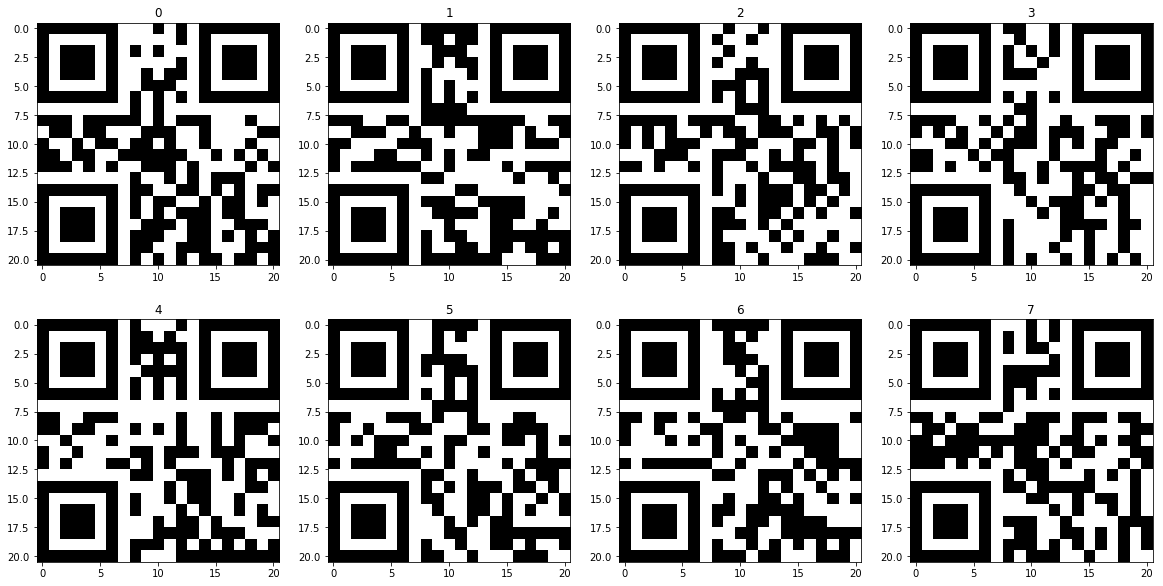

In [16]:
# Adding Format information
format_area=['111011111000100','111001011110011','111110110101010','111100010011101',
'110011000101111','110001100011000','110110001000001','110100101110110','101010000010010','101000100100101',
'101111001111100','101101101001011','100010111111001','100000011001110','100111110010111','100101010100000',
'011010101011111','011000001101000','011111100110001','011101000000110','010010010110100','010000110000011',
'010111011011010','010101111101101','001011010001001','001001110111110','001110011100111','001100111010000',
'000011101100010','000001001010101','000110100001100','000100000111011']

# This function defines all the mask patterns.
# Also instead of mapping 0 to white and 1 to black,
# I have flipped the output of the mask, which also gives same result.
def mask_function(mask,row,col):
    if mask==0:
        return (1,0)[(row+col)%2==0]
    if mask==1:
        return (1,0)[row%2==0]
    if mask==2:
        return (1,0)[col%3==0]
    if mask==3:
        return (1,0)[(row+col)%3==0]
    if mask==4:
        return (1,0)[(row//2+col//3)%2==0]
    if mask==5:
        return (1,0)[(row*col)%2+(row*col)%3==0]
    if mask==6:
        return (1,0)[((row*col)%2+(row*col)%3)%2==0]
    if mask==7:
        return (1,0)[((row+col)%2+(row*col)%3)%2==0]

qr_arr=np.zeros((size,size,8),dtype=np.uint8)
fig,ax=plt.subplots(2,4,figsize=(20,10))
plt.title("All 8 QR codes according to masks")
for mask in range(8):
    qr=np.copy(mask_arr)
    temp=[255*(1^(ord(format_area[8*ECL+mask][i])-48)) for i in range(0,7)]
    qr[8,np.where(qr[8,0:8]==64)[0]]=temp
    qr[size-1-np.where(qr[size:size-8:-1,8]==64)[0],8]=temp
    temp=[255*(1^(ord(format_area[8*ECL+mask][i])-48)) for i in range(7,15)]
    qr[8,size-8+np.where(qr[8,size-8:]==64)[0]]=temp
    qr[np.where(qr[0:9,8]==64)[0][::-1],8]=temp
    
    # Adding final message
    x,y,count,ind=size-1,size-1,-1,0
    for i in range(625):
        if qr[x,y]==128:
            qr[x,y]=255*(mask_function(mask,x,y)^(ord(final_msg_string[ind])-48))
            ind+=1
        if qr[x,y-1]==128:
            qr[x,y-1]=255*(mask_function(mask,x,y-1)^(ord(final_msg_string[ind])-48))
            ind+=1
        x+=count
        if x==-1 or x==size:
            count*=-1
            x+=count
            if y==8:
                y-=3
            else:
                y-=2
            if ind==len(final_msg_string):
                assert y==-1
                break
    qr_arr[:,:,mask]=qr
    ax[mask//4,mask%4].set_title('{}'.format(mask))
    ax[mask//4,mask%4].imshow(qr,cmap='gray')
plt.show()

# Penalty evaluation on masked QR.
After a mask pattern has been applied to the QR matrix, **it is given a penalty score based on four evaluation conditions that are defined in the QR code specification.** A QR code encoder must apply all eight mask patterns and evaluate penalty for each one. **Whichever mask pattern results in the lowest penalty score is the mask pattern that must be used for the final output.**

**The 4 penalty rules can be summerised as:**  
1. The first rule gives the QR code a penalty for each group of five or more same-colored modules in a row (or column).
* The second rule gives the QR code a penalty for each 2x2 area of same-colored modules in the matrix.
* The third rule gives the QR code a large penalty if there are patterns that look similar to the finder patterns.
* The fourth rule gives the QR code a penalty if more than half of the modules are dark or light, with a larger penalty for a larger difference.

**Evaluation Condition number 1:**  
For the first evaluation condition, check each row one-by-one and then column-by-column. If there are five consecutive modules of the same color, add 3 to the penalty. If there are more modules of the same color after the first five, add 1 for each additional module of the same color.

**Evaluation Condition number 2:**  
Look for all 2x2 areas of the same color inside QR and for each occurance add penalty of 3.

**Evaluation Condition number 3:**  
Look for the following pattern and add a penalty of 40 for each occourance.

![evaluation pattern](./images/pattern.png)

**Evaluation Condition number 4:**  
The final evaluation condition is based on the ratio of light modules to dark modules. To calculate this penalty rule, do the following steps:
1. Count the total number of modules in the matrix.
* Count how many dark modules there are in the matrix.
* Calculate the percent of modules in the matrix that are dark: (darkmodules / totalmodules) * 100
* Determine the previous and next multiple of five of this percent. For example, for 43 percent, the previous multiple of five is 40, and the next multiple of five is 45.
* Subtract 50 from each of these multiples of five and take the absolute value of the result. For example, |40 - 50| = |-10| = 10 and |45 - 50| = |-5| = 5.
* Divide each of these by five. For example, 10/5 = 2 and 5/5 = 1.
* Finally, take the smallest of the two numbers and multiply it by 10. In this example, the lower number is 1, so the result is 10. This is penalty score number 4.

For the entire QR code add all 4 penalties and the QR with least penalties is the optimised QR code for corresponding data.

In [17]:
def penalty_evaluation(qr):
    penalty,prev_penalty=0,False
    pattern1=[0,0,0,0,0]
    pattern2=[255,255,255,255,255]
    pattern3=[[0,0],[0,0]]
    pattern4=[[255,255],[255,255]]
    pattern5=[0,255,0,0,0,255,0,255,255,255,255]
    pattern6=[255,255,255,255,0,255,0,0,0,255,0]
    for j in range(size):
        for i in range(size):
            if i<=size-5 and (pattern_match(qr[i:i+5,j],pattern1)):
                if prev_penalty==False:
                    penalty+=3
                    prev_penalty=True
                else:
                    penalty+=1
            else:
                prev_penalty=False
    prev_penalty=False
    for i in range(size):
        for j in range(size):
            if j<=size-5 and (pattern_match(qr[i,j:j+5],pattern1) or pattern_match(qr[i,j:j+5],pattern2)):
                if prev_penalty==False:
                    penalty+=3
                    prev_penalty=True
                else:
                    penalty+=1
            else:
                prev_penalty=False
            if i<=size-2 and j<=size-2 and pattern_match(qr[i:i+2,j:j+2],pattern3):
                penalty+=3
            if i<=size-2 and j<=size-2 and pattern_match(qr[i:i+2,j:j+2],pattern4):
                penalty+=3
            if i<=size-11 and pattern_match(qr[i:i+11,j],pattern5):
                penalty+=40
            if i<=size-11 and pattern_match(qr[i:i+11,j],pattern6):
                penalty+=40
            if j<=size-11 and pattern_match(qr[i,j:j+11],pattern5):
                penalty+=4
            if j<=size-11 and pattern_match(qr[i,j:j+11],pattern6):
                penalty+=40
                
    uni,cnt=np.unique(qr,return_counts=True)
    frequency=dict(zip(uni,cnt))
    dark_percent=frequency[0]/(size*size)
    penalty+=int(2*min(abs(5*(dark_percent//5)-50),abs(5*(dark_percent//5+1)-50)))
    return penalty

def pattern_match(array,pattern):
    return (array==pattern).all()

In [18]:
penalty_lst=[]
for mask in range(8):
    penalty_lst.append(penalty_evaluation(qr_arr[:,:,mask]))
print("Mask and its corresponding penalties are: {}".format(dict(zip(range(8),penalty_lst))))

Mask and its corresponding penalties are: {0: 406, 1: 416, 2: 372, 3: 369, 4: 492, 5: 421, 6: 419, 7: 413}


# Displaying the least penalty QR code

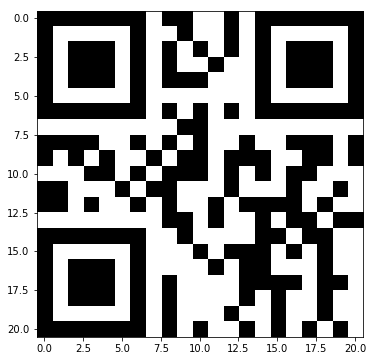

In [19]:
ind=penalty_lst.index(min(penalty_lst))
fig,ax=plt.subplots(1,1,figsize=(6,6))
ax.imshow(qr_arr[:,:,ind],cmap='gray')
plt.show()

# Displaying all essential variables

In [20]:
# Displaying all results
print(version,mode,ECL,'\n')
print(mode_indicator,character_count,data,'\n')
print(combined_data,'\n')
print(codeblocks,'\n')
for i,j in enumerate(block_groups):
    print('Codeblock no. {}:{}'.format(i,j))
for i,j in enumerate(error_block_groups):
    print('Error codeblock no. {}:{}'.format(i,j))
print('\n',codeWord,ErrorBlock,nb1,wnb1,nb2,wnb2,'\n')
print(final_msg_string,'\n')

0 1 0 

0010 000010000 1010000101001000000001100111000110111010001001111101000100111000111001111011001100000111 

00100000100001010000101001000000001100111000110111010001001111101000100111000111001111011001100000111000000000001110110000010001111011000001000111101100 

[32, 133, 10, 64, 51, 141, 209, 62, 137, 199, 61, 152, 56, 0, 236, 17, 236, 17, 236] 

Codeblock no. 0:[32, 133, 10, 64, 51, 141, 209, 62, 137, 199, 61, 152, 56, 0, 236, 17, 236, 17, 236]
Error codeblock no. 0:[185, 124, 144, 161, 124, 15, 6]

 19 7 1 19 0 0 

0010000010000101000010100100000000110011100011011101000100111110100010011100011100111101100110000011100000000000111011000001000111101100000100011110110010111001011111001001000010100001011111000000111100000110 

